# Q1 

###### import package

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

###### read data

In [2]:
Female_data = pd.read_csv(r"D:\Program Files\Document\DA\Female.csv")
Male_data = pd.read_csv(r"D:\Program Files\Document\DA\Male.csv")

N = len(Female_data)
#log transformation
Female_data_log = np.log1p(Female_data)
Male_data_log = np.log1p(Male_data)

Var_Female_data = Female_data_log.var(ddof=1)
Var_Male_data = Male_data_log.var(ddof=1)

###### calculate statisics

In [3]:
#std deviation
s = np.sqrt((Var_Female_data + Var_Male_data)/2)
t = (Female_data_log.mean() - Male_data_log.mean())/(s*np.sqrt(2/N))
t2, p2 = stats.ttest_ind(Female_data_log,Male_data_log) 
# 自由度
df = 2*N - 2
# 計算 p-value after comparison with the t
p = 1 - stats.t.cdf(t,df=df)

###### print result

In [4]:
print("p = " + str(2*p))
print("t = " + str(t2))
print("p(t) = " + str(2*p2))

p = [5.68158054e-05 2.10973532e-05 4.77621800e-08]
t = [4.43535567 4.7374114  6.52107442]
p(t) = [1.13631611e-04 4.21947064e-05 9.55243601e-08]


In [5]:
for i in range(0, len(p)):
    if 2*p[i] < p2[i]:
        print(Female_data.columns[i]+" is significantly different")
    else:
        print(Female_data.columns[i]+" is not significantly different")

Length is significantly different
Width is significantly different
Height is significantly different


# Q2

###### import package

In [6]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import math
import matplotlib.pyplot as plt

## a.

###### read ORL data

In [7]:
X = np.zeros((400, 2576))
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        X[i+j*10] = image_array.flatten()
        y = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
y = list(_flatten(y))

###### find less mse under different lambda

<ipython-input-8-eef449c5a4e7>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, y)
C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016627935728148246, tolerance: 0.0036000000000000003
  model = cd_fast.enet_coordinate_descent(


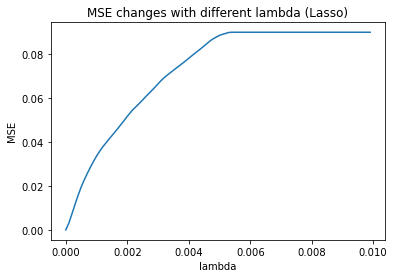

In [8]:
mse = []
x_axis = []
for i in range(0,100,1):
    '''lasso回归'''
    lasso = Lasso(alpha = i/10000,normalize = True)
    lasso.fit(X, y)
    mse.append(np.mean((lasso.predict(X) - y) ** 2)) 
    x_axis.append(i/10000)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("MSE changes with different lambda (Lasso)")
plt.plot(x_axis,mse)

C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.06671e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


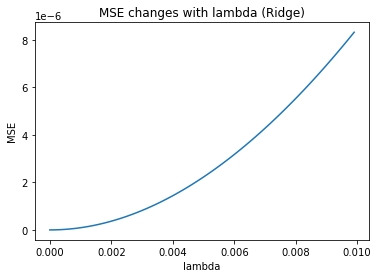

In [9]:
mse = []
x_axis = []
for i in range(0,100,1):
    ridge = Ridge(alpha = i/10000,normalize = True)
    ridge.fit(X, y)
    mse.append(np.mean((ridge.predict(X) - y) ** 2)) 
    x_axis.append(i/10000)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("MSE changes with lambda (Ridge)")
plt.plot(x_axis,mse)

#### MSE is smaller when lambda is small, thus we choose a small value (0.001) as lambda

## b.

######  Lasso regression under small lambda (0.001)

In [10]:
lasso = Lasso(alpha = 0.001,normalize = True)
lasso.fit(X, y)
n = np.sum(lasso.coef_ != 0)
print('Lasso回歸後選定的像素點：' + str(n)+"個")

important_pixels = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        important_pixels.append(i)

Lasso回歸後選定的像素點：52個


###### plot the selected pixels on the image

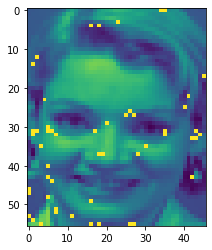

In [11]:
image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\1_1.png")
img_array = np.array(image)
#print(len(important_pixels),"important pixels at")
for i in range(0, len(important_pixels)): #math.floor()
    col = math.floor(important_pixels[i]/46)
    row = important_pixels[i]-46*col
    #print("(",col,",", row,")")    
    img_array[int(col)][int(row)]=255
plt.imshow(img_array, interpolation='nearest')
plt.show()

# Q3

###### import package

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy

###### read data

In [13]:
data = pd.read_csv(r"D:\Program Files\Document\DA\economics of transportation equipment.csv")
y = data.loc[:,"Value Added"]
X = data.loc[:,["Year","Capital","Labor"]]

###### using OLS regression

In [14]:
model = sm.regression.linear_model.OLS(y, X).fit()
print(model.summary())

X_Labor = X.loc[:,"Labor"].to_numpy()
X_Capital = X.loc[:,"Capital"].to_numpy()

y=y.to_numpy()

                                 OLS Regression Results                                
Dep. Variable:            Value Added   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              931.6
Date:                Sun, 11 Apr 2021   Prob (F-statistic):                    1.79e-14
Time:                        18:58:23   Log-Likelihood:                         -120.00
No. Observations:                  15   AIC:                                      246.0
Df Residuals:                      12   BIC:                                      248.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


###### define Cobb-Douglas function

In [15]:
def sm_model(B1):
    return np.sum( ((X_Capital * B1 + X_Labor * (1-B1)) - y) ** 2 )

###### optimize

In [16]:
res = scipy.optimize.minimize(sm_model, x0 = 0)
print('under constrain that Beta1 + Beta2 = 1\nestimate: Beta1 = ', res.x[0], ', and Beta2 =', (1- res.x[0]))

under constrain that Beta1 + Beta2 = 1
estimate: Beta1 =  3.7161686266426086 , and Beta2 = -2.7161686266426086


# Q4

###### import package

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###### read  AutoMPG dataset

In [18]:
data = pd.read_csv(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\DA_Demo.csv")
X=data.drop(" car name",axis = 1).to_numpy()

###### define pca function

In [19]:
def pca(dataMat, use_cov, topNfeat=20, ):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    if use_cov == True:
        covMat = np.cov(meanRemoved, rowvar=0)
    else:
        covMat = np.corrcoef(meanRemoved, rowvar=0) 
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    meanRemoved_score_matrix = meanRemoved * eigVect
    original_matrix = (meanRemoved_score_matrix * eigVect.T) + meanVals
    return meanRemoved_score_matrix, original_matrix, eigVal, eigVect

###### define plotting function

In [20]:
def show_reduction_picture(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90,c='green')
    ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
    plt.show()

In [21]:
def show_eigVal_picture(eigVals):
    x_axis=[]
    y = []
    y_culmulated = []
    total_val = eigVals.sum()
    y_culmulated.append(eigVals[0]/total_val)
    for i in range(0,len(eigVals)):
        x_axis.append(i)
        y.append(eigVals[i]/total_val)
        if i !=0 :
            y_culmulated.append(eigVals[i]/total_val+y_culmulated[i-1])
    fig, ax1 = plt.subplots()
    
    color = 'tab:blue'
    ax1.set_xlabel("number of PC adden")
    ax1.set_ylabel("Variance", color=color)
    ax1.bar(x_axis, eigVals, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:red'
    ax2.set_ylabel("Cumulative Percentage", color=color)  # we already handled the x-label with ax1
    ax2.plot(x_axis,y_culmulated , color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

###### calling pca fuction using correlation matrix

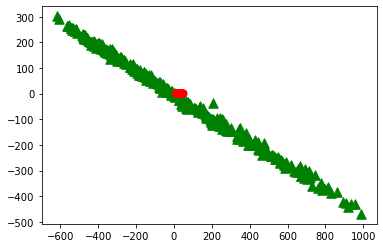

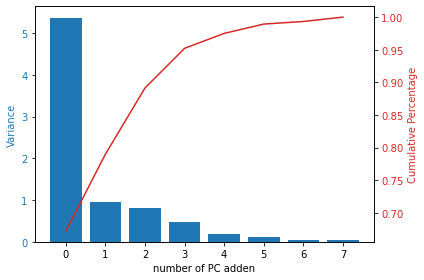

In [22]:
meanRemoved_score_matrix, original_matrix, eigVals, eigVects = pca(X, False)
show_reduction_picture(meanRemoved_score_matrix,original_matrix)
show_eigVal_picture(eigVals)

In [23]:
print("Loading Matrix:\n",eigVects)
print("Eigen Values:\n",eigVals)
print("Eigen Vectors:\n",eigVects)
print("Score Matrix:\n",X*eigVects)

Loading Matrix:
 [[-0.38586239 -0.07663269  0.29228579  0.09998251  0.74036644  0.38735165
   0.1151321  -0.19588516]
 [-0.27786815  0.50150064  0.30732382 -0.74328281 -0.04739508 -0.12086663
  -0.07951102 -0.0345266 ]
 [-0.21386777 -0.6904632   0.5871892  -0.10601968 -0.30134385 -0.11002592
  -0.0542884   0.12501506]
 [-0.2647309  -0.41690206 -0.63943514 -0.49280794  0.09773197  0.20293343
  -0.03518826  0.22891382]
 [ 0.40157579 -0.21102    -0.00089399 -0.32246785 -0.13127292  0.23585961
   0.30991105 -0.72202073]
 [ 0.40183594  0.11148007  0.23605571 -0.11971643 -0.08426839  0.6667096
   0.13477548  0.53504996]
 [ 0.41644435 -0.12632499  0.07423622 -0.13581398  0.30331627 -0.00699705
  -0.82916553 -0.08422855]
 [ 0.4023885  -0.13842878  0.07223935 -0.21603551  0.48261485 -0.53092548
   0.41774679  0.27878265]]
Eigen Values:
 [5.3758723  0.94366326 0.81164365 0.48615594 0.18282657 0.11432193
 0.03196954 0.05354682]
Eigen Vectors:
 [[-0.38586239 -0.07663269  0.29228579  0.09998251  0.

###### calling pca fuction using covariance matrix

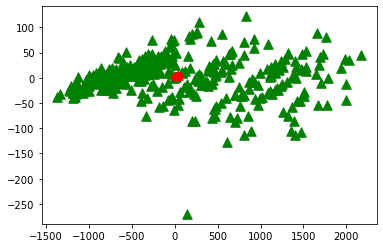

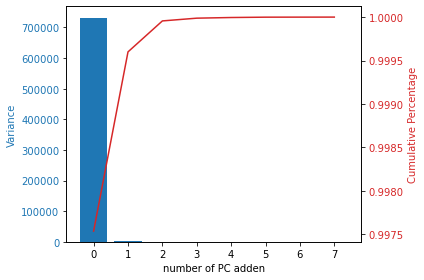

In [24]:
meanRemoved_score_matrix, original_matrix, eigVals, eigVects = pca(X, True)
show_reduction_picture(meanRemoved_score_matrix,original_matrix)
show_eigVal_picture(eigVals)

In [25]:
print("Loading Matrix:\n",eigVects)
print("\nEigen Values:\n",eigVals)
print("\nEigen Vectors:\n",eigVects)
print("\nScore Matrix:\n",X*eigVects)

Loading Matrix:
 [[-7.59590581e-03  1.75785097e-02  4.19212264e-02  8.31000630e-01
  -5.49535507e-01 -5.61451547e-02  3.97118180e-02  2.43984110e-02]
 [-5.51527155e-04  3.24675463e-03 -1.23716014e-02  2.00685150e-02
  -5.30801776e-02 -8.77898223e-03 -9.25502182e-01 -3.74145010e-01]
 [-1.33689886e-03  2.39497354e-02  4.41269251e-02  5.51778482e-01
   8.24191632e-01  1.12006207e-01 -3.03888666e-02 -1.60382361e-02]
 [-1.35281211e-03  3.48299933e-02  7.68839939e-02 -2.08463123e-02
  -1.25527681e-01  9.88134411e-01 -9.09879495e-03  1.37739900e-02]
 [ 9.92644743e-01  1.20867105e-01  2.65874637e-03  3.53993832e-03
  -3.93041220e-03 -3.52931159e-03  1.85727735e-04 -1.31438408e-04]
 [ 3.89660894e-02 -2.98328518e-01 -9.47540130e-01  6.34424404e-02
   5.73169239e-03  8.63249865e-02  8.51000586e-03  8.19890724e-03]
 [ 1.14338202e-01 -9.45572572e-01  3.03873075e-01  9.22239231e-03
   3.41321063e-03  1.06909276e-02 -9.19061696e-04 -1.63889805e-02]
 [ 1.79257460e-03 -1.33223878e-02  7.28065126e-03 -4

#### two results are very different between covariance and correlation methods, thus PCA is not scale-invariant

# Q5

###### import package

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
from tkinter import _flatten

###### read ORL data

In [35]:
X = np.zeros((400, 2576))
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        X[i+j*10] = image_array.flatten()

###### define PCA function

In [36]:
def pca(dataMat, use_cov, topNfeat=20, ):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    if use_cov == True:
        covMat = np.cov(meanRemoved, rowvar=0)
    else:
        covMat = np.corrcoef(meanRemoved, rowvar=0) 
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    meanRemoved_score_matrix = meanRemoved * eigVect
    original_matrix = (meanRemoved_score_matrix * eigVect.T) + meanVals
    return meanRemoved_score_matrix, original_matrix, eigVal, eigVect

###### define analyse function

In [41]:
def analyse_data(dataMat):
    Printed = 0
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat-meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigvals, eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigvals)

    topNfeat = 2576
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    cov_all_score = complex(sum(eigvals)).real
    sum_cov_score = 0
    for i in range(0, len(eigValInd)):
        line_cov_score = complex(eigvals[eigValInd[i]]).real
        sum_cov_score += line_cov_score
        if  60 > (sum_cov_score/cov_all_score*100).real > 50 and Printed == 0:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))
            Printed = 1
        elif 70 > (sum_cov_score/cov_all_score*100).real > 60 and Printed == 1:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))
            Printed = 2
        elif 80 > (sum_cov_score/cov_all_score*100).real > 70 and Printed == 2:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))
            Printed = 3
        elif 90 > (sum_cov_score/cov_all_score*100).real > 80 and Printed == 3:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))
            Printed = 4
        elif (sum_cov_score/cov_all_score*100).real > 90 and Printed == 4:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))
            Printed = 5

## a(1).

###### call function (X=400x2576)

In [42]:
meanRemoved_score_matrix, original_matrix, eigVals, eigVects = pca(X, True)
analyse_data(meanRemoved_score_matrix)

Principal components： 5, Variance percentage：5.42%, Cumulated percentage：51.0%
Principal components： 9, Variance percentage：2.07%, Cumulated percentage：61.7%
Principal components：16, Variance percentage：0.95%, Cumulated percentage：70.8%
Principal components：32, Variance percentage：0.40%, Cumulated percentage：80.3%
Principal components：76, Variance percentage：0.13%, Cumulated percentage：90.1%


## b(1).

###### plot PC1 image

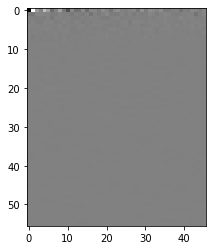

In [31]:
first_PC = X@eigVects
first_PC=first_PC[0]
first_PC_array=first_PC.reshape(56,46).real

min_first_PC_array = np.min(first_PC_array)
range_first_PC_array = np.max(first_PC_array) - np.min(first_PC_array)
for i, j in enumerate(first_PC_array):
    first_PC_array[i] = 255 * ((j - min_first_PC_array) / range_first_PC_array)
    
imgplot = plt.imshow(first_PC_array, cmap='gray', vmin=0, vmax=255)
plt.show()

## a(2).

###### call function (X=2576x400)

In [32]:
meanRemoved_score_matrix, original_matrix, eigVals, eigVects = pca(X.T, True)
analyse_data(meanRemoved_score_matrix)

主成分： 2, 該方差佔比：10.55%, 累積方差佔比：57.0%
主成分： 3, 該方差佔比：4.57%, 累積方差佔比：61.5%
主成分： 6, 該方差佔比：2.07%, 累積方差佔比：70.5%
主成分：15, 該方差佔比：0.66%, 累積方差佔比：80.2%
主成分：47, 該方差佔比：0.17%, 累積方差佔比：90.1%


## b(2).

###### plot PC1 image

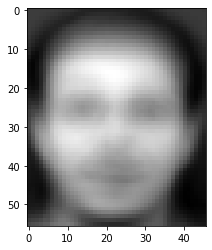

In [33]:
first_PC = X.T@eigVects
first_PC=first_PC.T[0]
first_PC_array=first_PC.reshape(56,46).real

min_first_PC_array = np.min(first_PC_array)
range_first_PC_array = np.max(first_PC_array) - np.min(first_PC_array)
for i, j in enumerate(first_PC_array):
    first_PC_array[i] = 255 * ((j - min_first_PC_array) / range_first_PC_array)
    
imgplot = plt.imshow(first_PC_array, cmap='gray', vmin=0, vmax=255)
plt.show()